## Lesson 12
# HyperParameter Tuning

## GridSearchCV for Logistic Regression

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [50]:
# Import dataset

df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
df.head(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
# Select Relavant Data

df = df[["Pclass", 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]
df.dropna(inplace=True)
df.head(4)

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,male,22.0,1,0,7.2500,0
1,1,female,38.0,1,0,71.2833,1
2,3,female,26.0,0,0,7.9250,1
3,1,female,35.0,1,0,53.1000,1


In [4]:
# Categorizing based on gender
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [53]:
# Define features and target
X = df.drop(columns=['Survived'])
y = df['Survived']


In [6]:
# Split the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [7]:
# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
# Train the model

model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [9]:
# Prediction

y_pred = model.predict(X_test)

In [10]:
# Evaluation
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80        87
           1       0.69      0.64      0.67        56

    accuracy                           0.75       143
   macro avg       0.74      0.73      0.73       143
weighted avg       0.75      0.75      0.75       143



In [63]:
# Defining the parameter grid

param_grid_lg = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

In [64]:
# Grid Search

grid_search_lg = GridSearchCV(LogisticRegression(), param_grid_lg, cv=5, scoring="accuracy", n_jobs=-1)
grid_search_lg.fit(X_train, y_train)

,estimator,LogisticRegression()
,param_grid,"{'C': [0.01, 0.1, ...], 'solver': ['liblinear', 'lbfgs']}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [65]:
# Best Parameters

print(f"Best Parameters: {grid_search_lg.best_params_}")

Best Parameters: {'C': 10, 'solver': 'liblinear'}


In [66]:
# Evalute the best model

best_model_lg = grid_search_lg.best_estimator_
y_pred_lg = best_model_lg.predict(X_test)

print(classification_report(y_test, y_pred_lg))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80        87
           1       0.69      0.64      0.67        56

    accuracy                           0.75       143
   macro avg       0.74      0.73      0.73       143
weighted avg       0.75      0.75      0.75       143



In [15]:
# Import libraries for KNN

from sklearn.neighbors import KNeighborsClassifier

In [67]:
# Define a hyperparameters for KNN

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

In [68]:
# Grid Search for KNN

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring="accuracy", n_jobs=-1)
grid_search_knn.fit(X_train, y_train)

,estimator,KNeighborsClassifier()
,param_grid,"{'metric': ['euclidean', 'manhattan'], 'n_neighbors': [3, 5, ...], 'weights': ['uniform', 'distance']}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,9


In [69]:
# Best Parameters

print(f"Best Parameters: {grid_search_knn.best_params_}")

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}


In [70]:
#Evaluate the model
best_model_knn = grid_search_knn.best_estimator_
y_pred_knn = best_model_knn.predict(X_test)

print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81        87
           1       0.72      0.68      0.70        56

    accuracy                           0.77       143
   macro avg       0.76      0.75      0.76       143
weighted avg       0.77      0.77      0.77       143



In [71]:
# Importing SVM

from sklearn.svm import SVC

In [72]:
# Define a hyperparameters for SVM

param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf'],
    'gamma': ['scale', 'auto']
}

In [73]:
# Grid Search for SVM

grid_search_svm = GridSearchCV(SVC(), param_grid_svm, cv=5, scoring="accuracy", n_jobs=-1 )
grid_search_svm.fit(X_train, y_train)

,estimator,SVC()
,param_grid,"{'C': [0.1, 1, ...], 'gamma': ['scale', 'auto'], 'kernel': ['linear', 'poly', ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,10


In [74]:
# Best Parameters
print(f"Best Parameters: {grid_search_svm.best_params_}")

Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [75]:
# Evaluate the model

best_model_svm = grid_search_svm.best_estimator_
y_pred_svm = best_model_svm.predict(X_test)

print(classification_report(y_pred_svm,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        84
           1       1.00      1.00      1.00        59

    accuracy                           1.00       143
   macro avg       1.00      1.00      1.00       143
weighted avg       1.00      1.00      1.00       143



In [25]:
# Import Random Forest

from sklearn.ensemble import RandomForestClassifier

In [26]:
# Define Hyperparameters

param_grid_rf = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [27]:
# Grid Search for Random Forest

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring="accuracy", n_jobs=-1, verbose=1 )
grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'bootstrap': [True, False], 'max_depth': [None, 10, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], ...}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,300


In [28]:
# The check the best parameters

print(f"The best parameters for Random Forest: {grid_search_rf.best_params_}")

The best parameters for Random Forest: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}


In [29]:
# Evaluate the model Random Forest

best_model_rf = grid_search_rf.best_estimator_
y_pred_rf = best_model_rf.predict(X_test)

print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83        87
           1       0.75      0.70      0.72        56

    accuracy                           0.79       143
   macro avg       0.78      0.77      0.78       143
weighted avg       0.79      0.79      0.79       143



In [30]:
# Importing library for Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier

In [31]:
# Define Hyperparameters

param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'learning_rate': [0.01, 0.1, 0.2]
}

In [32]:
# Grid Search for Gradient Boosting
grid_search_gb =GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid_gb, cv=5, scoring="accuracy", n_jobs=-1, verbose=1 )
grid_search_gb.fit(X_train, y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


,estimator,GradientBoost...ndom_state=42)
,param_grid,"{'learning_rate': [0.01, 0.1, ...], 'max_depth': [3, 5, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], ...}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,loss,'log_loss'


In [33]:
# Checking the best params

print(f"The best params for Gradient Boosting: {grid_search_gb.best_params_}")

The best params for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


In [34]:
# Evaluate the model Gradient Boosting

best_model_rf = grid_search_rf.best_estimator_
y_pred_rf = best_model_rf.predict(X_test)

print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83        87
           1       0.75      0.70      0.72        56

    accuracy                           0.79       143
   macro avg       0.78      0.77      0.78       143
weighted avg       0.79      0.79      0.79       143



In [42]:
# Importing libraries for XGB

import xgboost as xgb

In [43]:
# Define Hyperparameters

param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

In [46]:
# Grid Search for XGBoost
grid_search_xgb =GridSearchCV(xgb.XGBClassifier(random_state=42, eval_metric = 'logloss'), param_grid_xgb, cv=5, scoring="accuracy", 
                              n_jobs=-1, verbose=1 )
grid_search_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


,estimator,"XGBClassifier...ree=None, ...)"
,param_grid,"{'colsample_bytree': [0.8, 0.9, ...], 'learning_rate': [0.01, 0.1, ...], 'max_depth': [3, 5, ...], 'n_estimators': [50, 100, ...], ...}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'binary:logistic'


In [48]:
# Check the best parameters for XGBoost

print(f"The best barameters for XGBoost: {grid_search_xgb.best_params_}")

The best barameters for XGBoost: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}


In [49]:
# Evaluate the model XGBoost

best_model_xgb = grid_search_xgb.best_estimator_
y_pred_xgb = best_model_xgb.predict(X_test)

print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84        87
           1       0.76      0.73      0.75        56

    accuracy                           0.80       143
   macro avg       0.80      0.79      0.79       143
weighted avg       0.80      0.80      0.80       143



## Excercise

### Use all the hyperparameters for tuning which have been done in this training but instead of survived classify it based on the age, so anyone 18 and above make it adult and anyone below 18 make it child, then make it binary based on child or adult

# Enhancement of Logistic Regression with More Parameters

In [58]:
# Enhanced Logistic Regression Parameters

param_grid_lr_enhanced = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver': ['liblinear', 'lbfgs', 'saga'],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'max_iter': [100, 200, 500, 1000]
}

# Make a serperate for liblinear

param_grid_lr_liblinear = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver': ['liblinear'],
    'penalty': ['l1', 'l2'],
    'max_iter': [100, 200, 500, 1000]
}

# Make a serperate for lbfgs

param_grid_lr_lbfgs = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver': ['lbfgs'],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'max_iter': [100, 200, 500, 1000]
}



In [59]:
# Grid Search for liblinear

grid_search_lr_lib = GridSearchCV(LogisticRegression(random_state=42), param_grid_lr_liblinear, cv=5, scoring="accuracy", n_jobs=-1)
grid_search_lr_lib.fit(X_train, y_train)

print(f"The best Parameters for Liblinear: {grid_search_lr_lib.best_params_}")

The best Parameters for Liblinear: {'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


In [60]:
# Evaluate the model GridSearch Libliner

best_model_lr_lib = grid_search_lr_lib.best_estimator_
y_pred_lr_lib = best_model_lr_lib.predict(X_test)

print(classification_report(y_test,y_pred_lr_lib))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80        87
           1       0.69      0.64      0.67        56

    accuracy                           0.75       143
   macro avg       0.74      0.73      0.73       143
weighted avg       0.75      0.75      0.75       143



## Excercise 2
### Check the enhanced and lbfgs and see if we see any different

# Comparison and Visualization

In [62]:
# Import neccessary Libraries

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
# Collecting all models and their prediction

models = {
    'Logisitc Regression': grid_search_lg.best_estimator_,
    'KNN': grid_search_knn.best_estimator_,
    'SVM': grid_search_svm.best_estimator_,
    'Random Forest': grid_search_rf.best_estimator_,
    'Gradient Boost': grid_search_gb.best_estimator_,
    'XGBoost': grid_search_xgb.best_estimator_,
    'Logistic Regression LR': grid_search_lr_lib.best_estimator_
}

# Get Predictions for all models

results = []

for name, model in models.items():
    if name in ['Logisitc Regression', 'KNN', 'SVM', 'Random Forest', 'Gradient Boost', 'XGBoost', 'Logistic Regression LR']:
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precission = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        results.append({
            'Model': name,
            'Accuracy': accuracy,
            'Precission': precission,
            'Recall': recall,
            'F1-Score': f1
        })

# Create a DataFrame using Pandas
results_df = pd.DataFrame(results)
print("Model Comparison:")
print(results_df.round(4))

Model Comparison:
                    Model  Accuracy  Precission  Recall  F1-Score
0     Logisitc Regression    0.7483      0.6923  0.6429    0.6667
1                     KNN    0.7692      0.7170  0.6786    0.6972
2                     SVM    0.7832      0.7119  0.7500    0.7304
3           Random Forest    0.7902      0.7500  0.6964    0.7222
4          Gradient Boost    0.7902      0.7407  0.7143    0.7273
5                 XGBoost    0.8042      0.7593  0.7321    0.7455
6  Logistic Regression LR    0.7483      0.6923  0.6429    0.6667


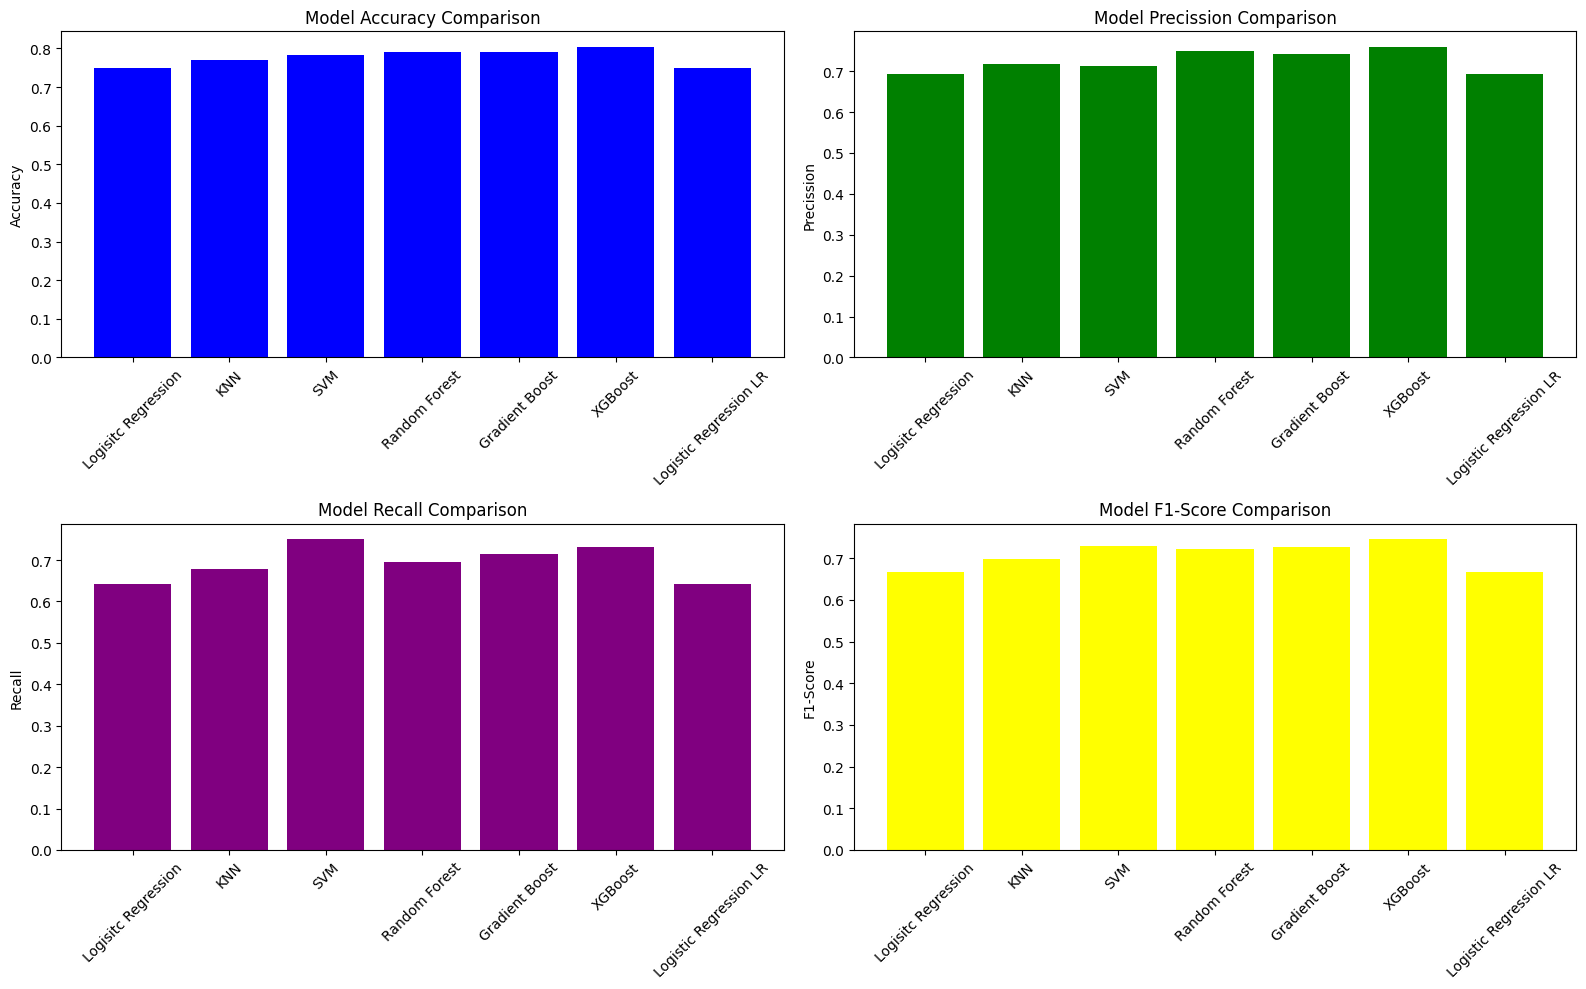

In [79]:
# Visualizing

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (16, 10))

# Accuracy Comparison
ax1.bar(results_df['Model'], results_df['Accuracy'], color='blue')
ax1.set_title("Model Accuracy Comparison")
ax1.set_ylabel('Accuracy')
ax1.tick_params(axis = 'x', rotation=45)

# Precission Comparison
ax2.bar(results_df['Model'], results_df['Precission'], color='green')
ax2.set_title("Model Precission Comparison")
ax2.set_ylabel('Precission')
ax2.tick_params(axis = 'x', rotation=45)

# Recall Comparison
ax3.bar(results_df['Model'], results_df['Recall'], color='purple')
ax3.set_title("Model Recall Comparison")
ax3.set_ylabel('Recall')
ax3.tick_params(axis = 'x', rotation=45)

# F1-Score Comparison
ax4.bar(results_df['Model'], results_df['F1-Score'], color='yellow')
ax4.set_title("Model F1-Score Comparison")
ax4.set_ylabel('F1-Score')
ax4.tick_params(axis = 'x', rotation=45)

plt.tight_layout()
plt.show()

# Using Randomized Search CV

In [80]:
# Importing libraries

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

In [82]:
# Define a parameters for RandomizedSearchCV

param_dist_rf = {
    'n_estimators': randint(50, 500),
    'max_depth': [None] + list(randint(5, 50).rvs(10)),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'bootstrap': [True, False]
}

In [83]:
# RandomizedSerachCV

random_search_cv = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_dist_rf,
    n_iter = 50,
    cv = 5,
    scoring = "accuracy",
    n_jobs = -1,
    random_state=42,
    verbose = 1
)

random_search_cv.fit(X_train, y_train)
print(f"The best Parameters for Randomized Search is:  {random_search_cv.best_params_}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
The best Parameters for Randomized Search is:  {'bootstrap': True, 'max_depth': np.int64(37), 'min_samples_leaf': 1, 'min_samples_split': 11, 'n_estimators': 221}


In [84]:
# Evaluate the model RandomizedSerachCV RandomForest

best_model_rscv = random_search_cv.best_estimator_
y_pred_rscv = best_model_rscv.predict(X_test)

print(classification_report(y_test,y_pred_rscv))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84        87
           1       0.76      0.70      0.73        56

    accuracy                           0.80       143
   macro avg       0.79      0.78      0.78       143
weighted avg       0.80      0.80      0.80       143



## Excercise 3:
### Randomized Search for Gradiant Boost